In [1]:
import numpy as np
import pandas as pd
import os
from os import listdir
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
os.chdir('../..')
from app_local.module import GestureTransformer

In [5]:
def plot_chart_predict(plots_per_row=30, body_part='leftWrist'):
    
    file_names = listdir('app_local/model_inputs/')
    n = len(file_names)

    global movements
    
    kx = body_part + '_x'
    ky = body_part + '_y'
    
    for j in range(n // plots_per_row + 1):
        
        plt.figure(figsize=(2 * plots_per_row, 2))

        for i in range (plots_per_row):
            plt.subplot(1, plots_per_row, i + 1)
            index = j*plots_per_row + i
            
            # specify axes range
            axes = plt.gca()
            axes.set_xlim([-2,2])
            axes.set_ylim([-2,2])
            axes.get_yaxis().set_visible(False)
            axes.get_xaxis().set_visible(False)

            if index < n:

                df = pd.read_csv('app_local/model_inputs/' + file_names[index])

                feature_names = list(df.columns)
                feat_dict = {feature:feature_names.index(feature) for feature in feature_names}
                gt = GestureTransformer(byrow=True, feature_names=feature_names)

                D = df.values.reshape(1,17,16)
                D = gt.transform(D).reshape(17,16)
                Dx = D[:,feat_dict[kx]]
                Dy = D[:,feat_dict[ky]]    

                # movement
                l1, u1 = 0, 16
                plt.plot(Dx[l1:u1],Dy[l1:u1],color = "xkcd:baby blue")

                # current frame
                plt.plot(Dx[u1-1],Dy[u1-1],color = "xkcd:baby blue",marker = "o")
                
                plt.title(file_names[index].replace('model_input_20181122_','').replace('.csv',''))

        plt.show()
        plt.close()    

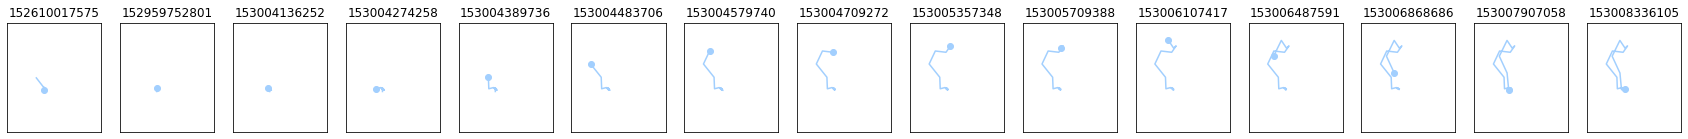

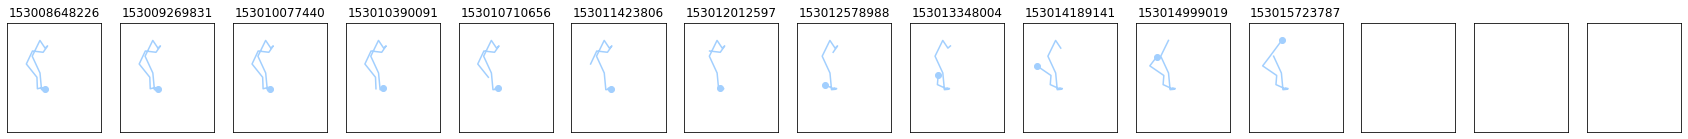

In [6]:
plot_chart_predict(plots_per_row=15, body_part='leftWrist')